In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
# Kinchen Human mesenchyme
adata1 = sc.read_csv('Human Colonic Mesenchyme(Kinchen., 2018)/GSE114374_Human_UC_expression_matrix.txt.gz', delimiter='\t').T

In [3]:
# Smillie Human stromal
adata2 = sc.read_mtx('Human stromal(smillie., 2019)/gene_sorted-Fib.matrix.mtx').T
genes2 = pd.read_csv('Human stromal(smillie., 2019)/Fib.genes.tsv', header=None, sep='\t')
adata2.var.index = genes2[0].values
barcodes2 = pd.read_csv('Human stromal(smillie., 2019)/Fib.barcodes2.tsv', header=None, sep='\t')
adata2.obs.index = barcodes2[0].values

In [4]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" 
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)

# Raw count 확인

adata1.X.sum(axis=1)

adata2.X.sum(axis=1)

# Log1p 확인

ki.max()

adata2.X.max()

# Scaling 확인

adata1.X.mean()

adata2.X.mean()

In [5]:
# namalize 상태로 변환
adata1.X = np.expm1(adata1.X)
sc.pp.normalize_total(adata2, target_sum=1e4)

In [6]:
adata1.obs['batch'] = 'kinchen'
adata2.obs['batch'] = 'smillie'

In [7]:
adata = sc.concat([adata1, adata2], label='batch', keys=['kinchen', 'smillie'])

In [8]:
adata.var['mt'] = adata.var_names.str.startswith("MT-")
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [9]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
RP11-536P6.3,False,False,5,0.000320,99.986404,1.175408e+01
SLC13A2,False,False,5,0.000415,99.986404,1.526551e+01
KB-226F1.2,False,False,5,0.000550,99.986404,2.024460e+01
RP11-664D1.1,False,False,5,0.000298,99.986404,1.096863e+01
HTR3A,False,False,5,0.000699,99.986404,2.569809e+01
...,...,...,...,...,...,...
RPL13,False,True,36198,56.391236,1.569001,2.073789e+06
TMSB4X,False,False,36229,78.736908,1.484704,2.895562e+06
RPL10,False,True,36381,75.072710,1.071380,2.760808e+06
RPL41,False,True,36463,67.267699,0.848402,2.473776e+06


In [10]:
sc.pp.filter_genes(adata, min_cells=10)
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [11]:
adata.obs.sort_values('n_genes_by_counts')

,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TGCGTGGTCAGATAAG-S54,kinchen,101,9960.749023,4.906771,0.049261,103.042198,1.034482
N539.LPB.AGCTTGAGTGAAAGAG,smillie,230,7943.261719,2074.468018,26.116074,141.843979,1.785715
N58.LPA2.GCTTGAACAGTTCATG,smillie,237,9270.216797,197.238647,2.127660,2366.864014,25.531918
N26.LPA.TGCGGGTCAGATCTGT,smillie,237,9189.189453,1914.414551,20.833334,225.225235,2.450980
N18.LPB.GTGATTCTTCTCTA,smillie,238,8557.692383,1394.230713,16.292133,1081.730713,12.640450
...,...,...,...,...,...,...,...
TGATTTCAGAGTCTGG-S54,kinchen,3916,9901.744141,281.257660,2.840486,1840.457031,18.587200
TTGCGTCCATCACCCT-S78,kinchen,3917,9887.274414,298.791229,3.021978,1674.589111,16.936811
TATGCCCAGTTACCCA-S54,kinchen,3919,9860.796875,280.297302,2.842542,2210.254395,22.414562
N661.LPB2.ACTTTCATCCACTGGG,smillie,3921,9828.362305,315.592743,3.211041,2050.660889,20.864727


In [12]:
sc.pp.filter_cells(adata, min_genes=500)

C:\Anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


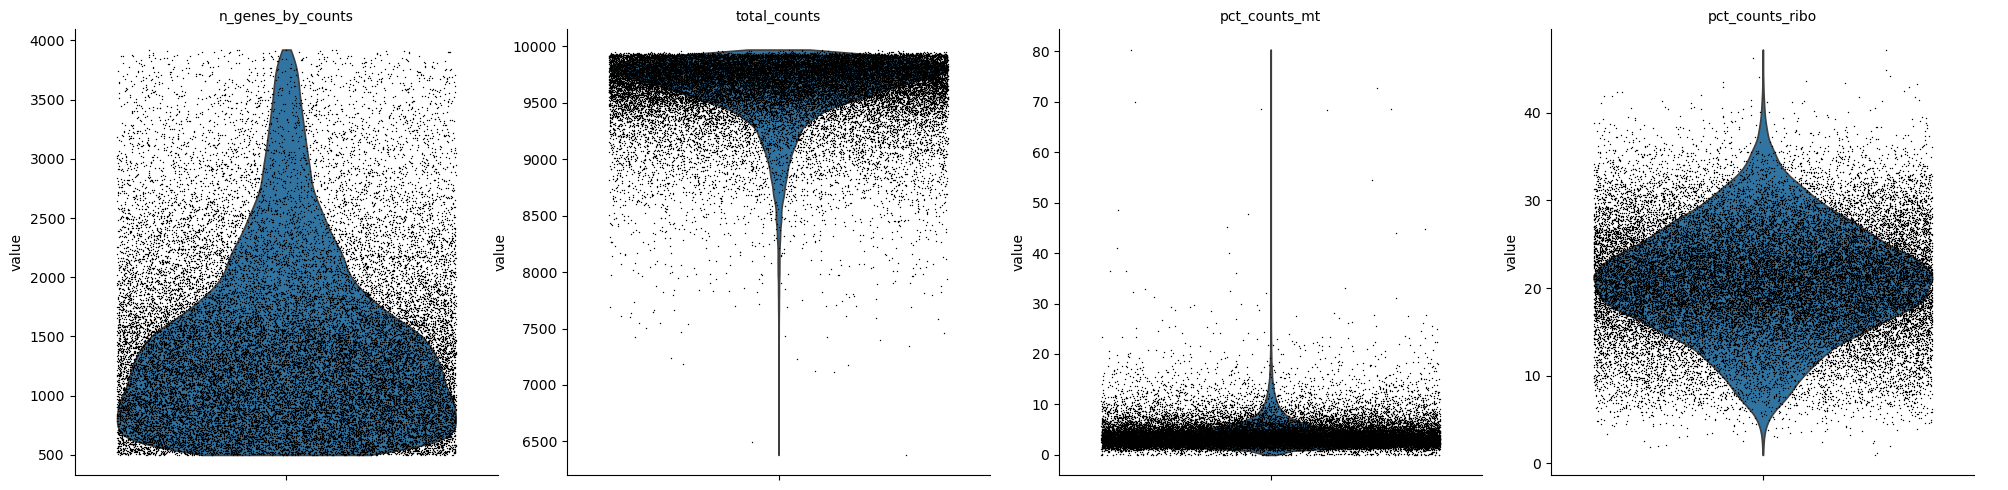

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [14]:
adata = adata[adata.obs.pct_counts_mt < 15]
adata = adata[adata.obs.pct_counts_ribo < 35]

In [15]:
sc.pp.log1p(adata)
adata.raw = adata.copy()

C:\Anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

In [17]:
adata = adata[:, adata.var.highly_variable].copy()

C:\Anaconda3\Lib\functools.py:934: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


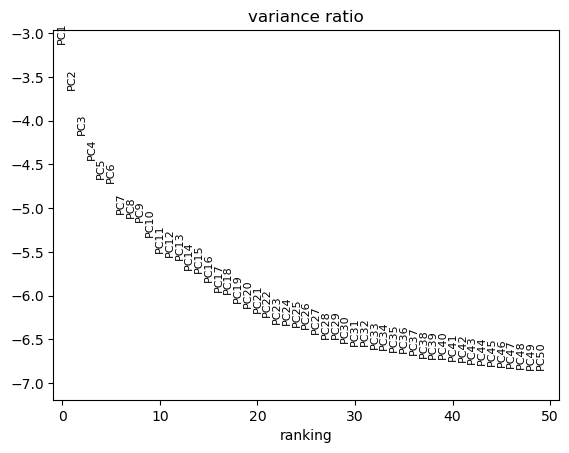

In [18]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
sc.external.pp.harmony_integrate(adata, key="batch", max_iter_harmony = 20)

2025-07-11 14:38:25,925 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
  File "C:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^

In [23]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50, use_rep="X_pca_harmony")
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

magma = plt.cm.get_cmap('magma', 256)
magma_colors = magma(np.linspace(0, 1, 256))
grey = np.array([[0.8, 0.8, 0.8, 1.0]])
new_colors = np.vstack((grey, magma_colors[20:])) 
custom_cmap1 = ListedColormap(new_colors)

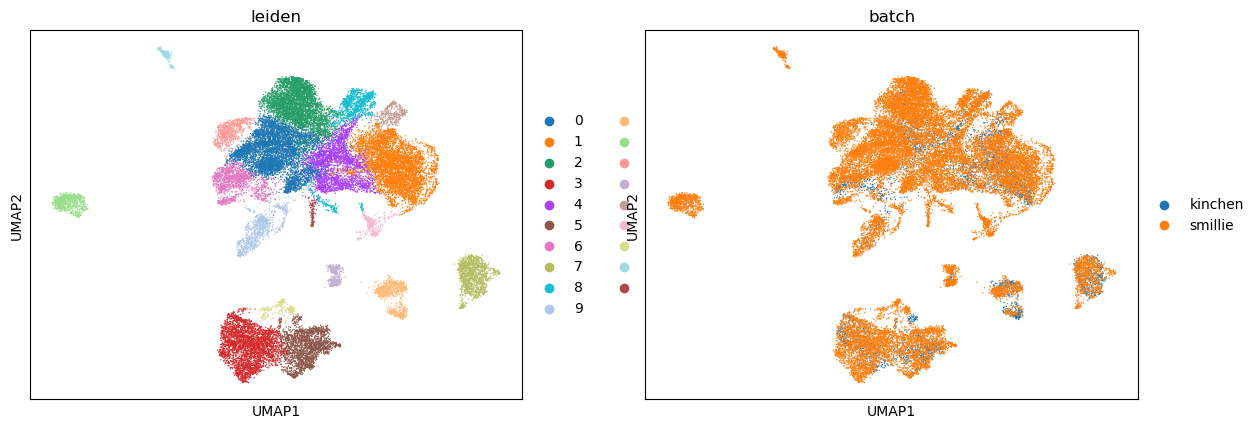

In [26]:
# 시각화
sc.pl.umap(adata, color=["leiden", "batch"], use_raw=True)

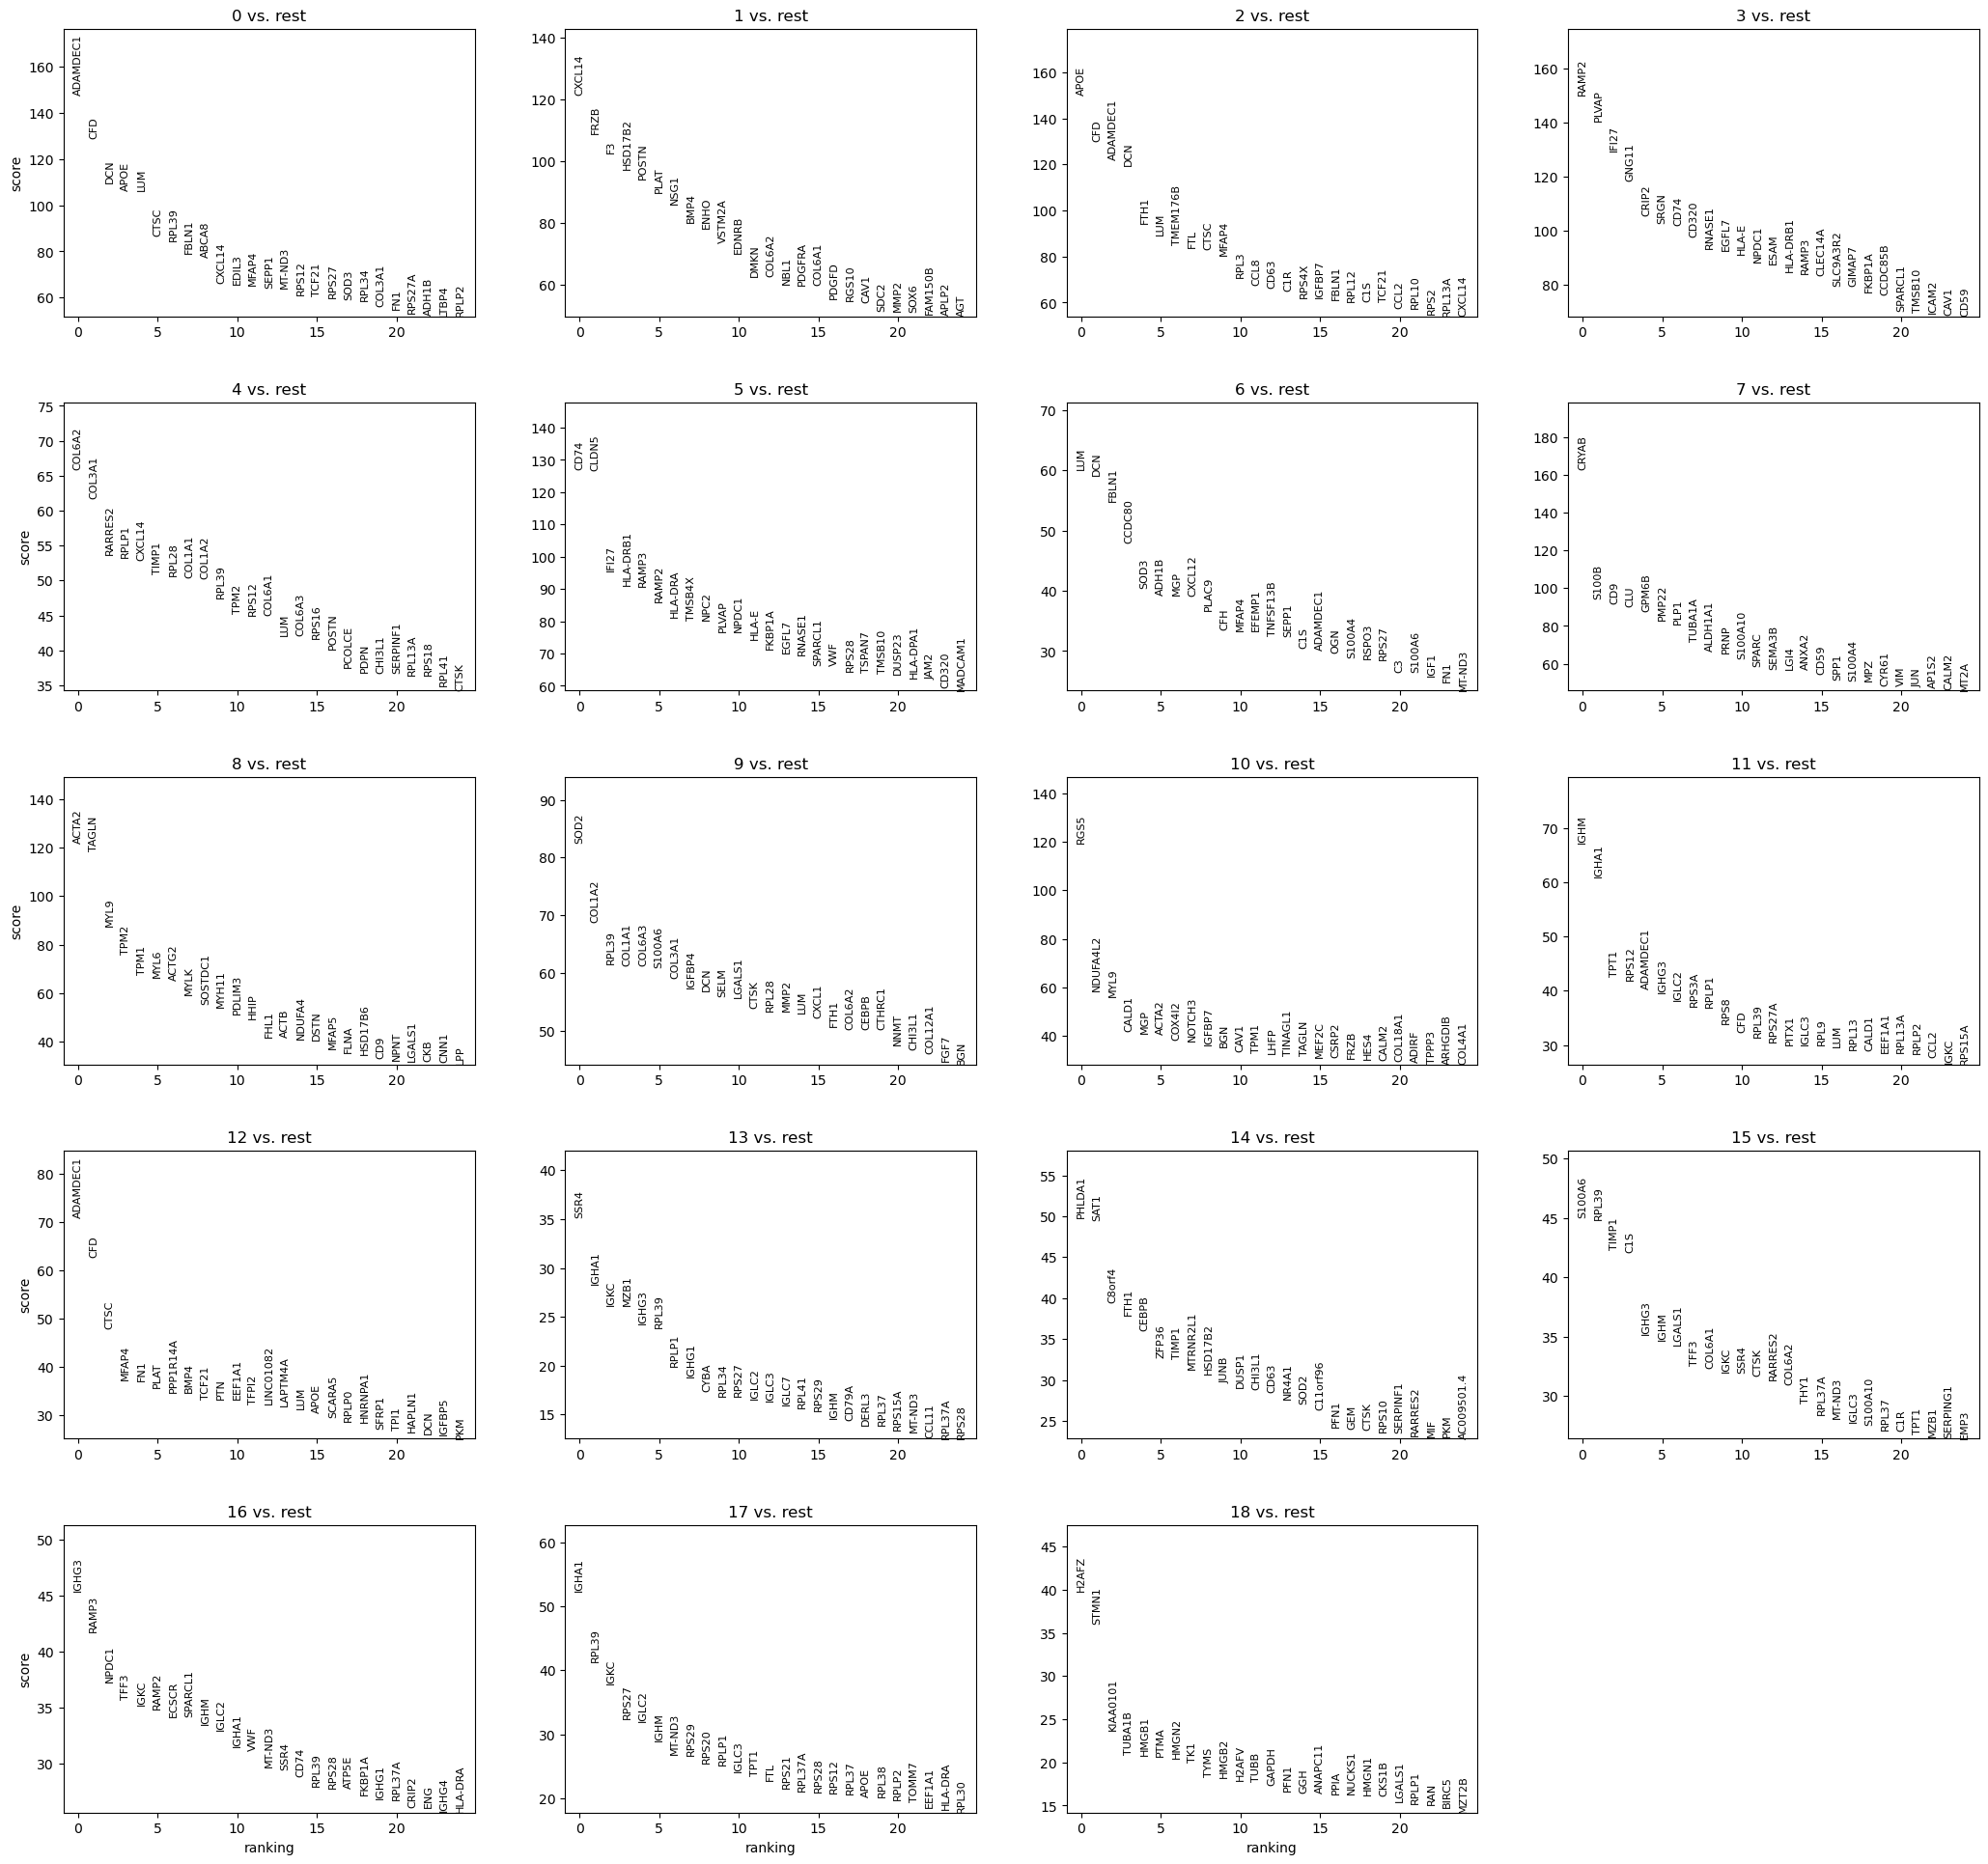

In [27]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)